In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numba
from numba import jit

In [3]:
Nx = 101
Nt = 500000
L =0.7
dx = L/(Nx-1)
f = 220
c = 2*L*f
dt = 5e-6
l=5e-5
gamma=5e-5

In [7]:
ya = np.linspace(0, 0.01, 70)
yb = np.linspace(0.01, 0, 31)
y0 = np.concatenate([ya, yb])

In [8]:
sol = np.zeros((Nt, Nx))

In [9]:
sol[0] = y0
sol[1] = y0

In [10]:
@numba.jit("f8[:,:](f8[:,:], i8, i8, f8, f8, f8, f8)", nopython=True, nogil=True)
def compute_d(d, times, length, dt, dx, l, gamma):
    for t in range(1, times-1):
        for i in range(2, length-2):
            outer_fact = (1/(c**2 * dt**2) + gamma/(2*dt))**(-1)
            p1 = 1/dx**2 * (d[t][i-1] - 2*d[t][i] + d[t][i+1])
            p2 = 1/(c**2 * dt**2) * (d[t-1][i] - 2*d[t][i])
            p3 = gamma/(2*dt) * d[t-1][i]
            p4 = l**2 / dx**4 * (d[t][i+2] - 4*d[t][i+1] + 6*d[t][i] - 4*d[t][i-1] + d[t][i-2])
            d[t+1][i] = outer_fact * (p1 - p2 + p3 - p4)
    return d

In [12]:
sol = compute_d(sol, Nt, Nx, dt, dx, l, gamma)

Text(0, 0.5, 'Amplitude')

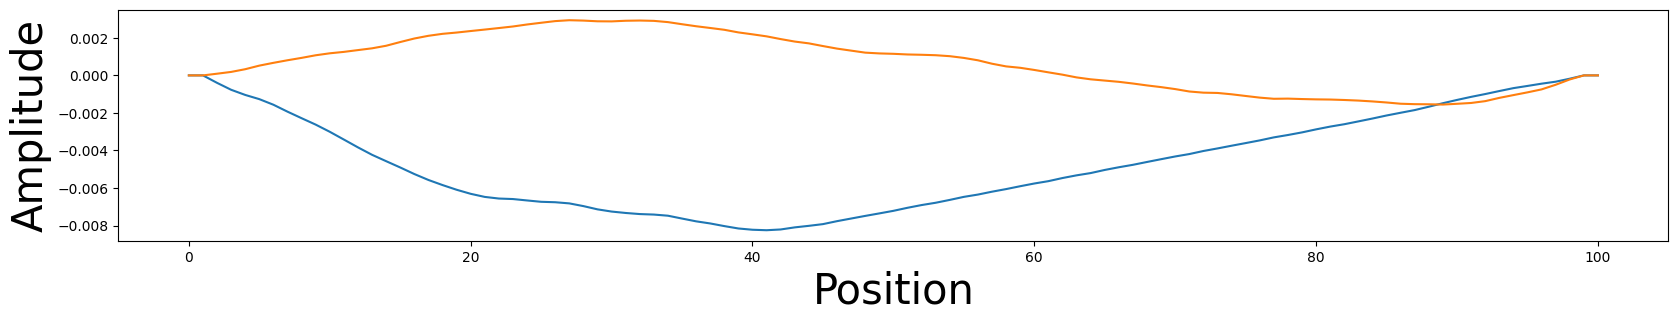

In [14]:
plt.figure(figsize=(20,3))
plt.plot(sol[500])
plt.plot(sol[10000])
plt.xlabel('Position', fontsize=30)
plt.ylabel('Amplitude', fontsize=30)

In [15]:
len(sol[::10,:])

50000

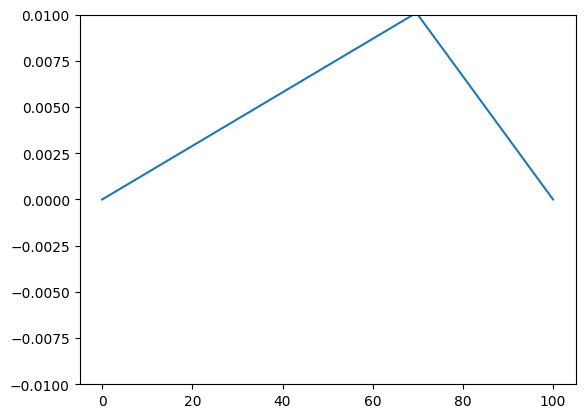

In [16]:
def animate(i):
    ax.clear()
    ax.plot(sol[i*10])
    ax.set_ylim(-0.01, 0.01)
    
fig, ax = plt.subplots(1,1)
ax.set_ylim(-0.01, 0.01)
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('string.gif',writer='pillow',fps=20)

In [17]:
# This is the way I did it in the video
def get_integral(n):
    sin_arr = np.sin(n*np.pi*np.linspace(0,1,101))
    return np.array([sum(sin_arr*s) for s in sol])

# This is the same as the function above. but runs WAAYYY faster. Use this instead; it is far more optimized
def get_integral_fast(n):
    sin_arr = np.sin(n*np.pi*np.linspace(0,1,101))
    return np.multiply(sol, sin_arr).sum(axis=1)

In [18]:
hms = [get_integral_fast(n) for n in range(10)]

In [19]:
all_harmonics=True
if all_harmonics:
    tot = sol.sum(axis=1)[::10] # all harmonics
else:
    tot = sum(hms)[::10] # only first 10 harmonics
tot = tot.astype(np.float32)

In [20]:
from scipy.io import wavfile
from IPython.display import Audio

In [55]:
wavfile.write('sound.wav',4000,tot)

In [56]:
Audio('sound.wav')